In [14]:
# Importa las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importa las clases de entrenamiento y evaluacion
from sklearn.model_selection import train_test_split
# Importa las metricas
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

sns.set()

Objetivo: Se cuenta con el dataset de incumplimiento de clientes para una compañía de tarjetas de crédito. De cada cliente se tiene el balance que le llegó de la tarjeta, si es un estudiante universitario o no y el sueldo anual. Además, se dispone si el cliente incumplió el pago o no.

In [15]:
credit = pd.read_csv("./dataset/UCI_Credit_Card_procesados.csv")

Modelo de regresión logística

In [16]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Se fuerza al objetivo a ser del tipo entero
credit["default.payment.next.month"] = credit["default.payment.next.month"].astype('int64')

In [22]:
# Separa las variables predictoras de la variable a predecir
X = credit.loc[:, ['PAY_0']].values
y = credit.loc[:, "default.payment.next.month"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

In [23]:
# Estandariza los sets
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [24]:
model_logistic = LogisticRegression(random_state = 0, class_weight="balanced")
model_logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [25]:
y_pred = model_logistic.predict(X_test)

# Matriz de confusion
cm_logistic = confusion_matrix(y_test, y_pred)

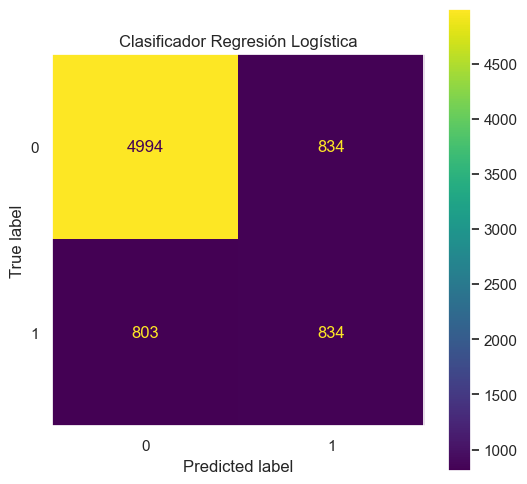

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=model_logistic.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresión Logística");

In [27]:
# Metricas
print("Clasificador Regresión Logística")
P = np.sum(cm_logistic[1, :])
N = np.sum(cm_logistic[0, :])
TP = cm_logistic[1, 1]
TN = cm_logistic[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Clasificador Regresión Logística
Sensibilidad: 0.5094685400122174
Especificidad: 0.8568977350720659
Exactitud balanceada: 0.6831831375421417
Precision: 0.5
Recuperación: 0.5094685400122174
F1-score: 0.5046898638426627


Modelo KNN

In [28]:
# Entrenamiento
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [29]:
# Evaluacion
y_pred  = classifier_knn.predict(X_test)

# Matriz de confusion
cm_knn = confusion_matrix(y_test, y_pred)

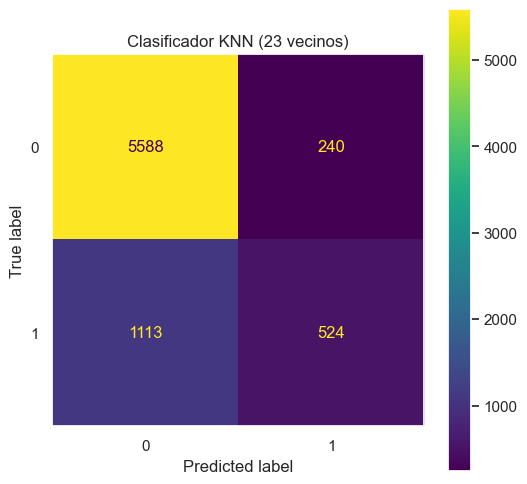

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=classifier_knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN (23 vecinos)");

In [31]:
# Metricas
print("Clasificador KNN (23 vecinos)")
P = np.sum(cm_knn[1, :])
N = np.sum(cm_knn[0, :])
TP = cm_knn[1, 1]
TN = cm_knn[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Clasificador KNN (23 vecinos)
Sensibilidad: 0.32009773976786804
Especificidad: 0.9588194921070693
Exactitud balanceada: 0.6394586159374687
Precision: 0.6858638743455497
Recuperación: 0.32009773976786804
F1-score: 0.436484798000833


Modelo SVM

In [32]:
from sklearn.svm import SVC

In [33]:
# Define el modelo
svm_credit = SVC(C=1, kernel='linear')
svm_credit.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [35]:
y_pred = svm_credit.predict(X_test)

# Matriz de confusion
cm_svm = confusion_matrix(y_test, y_pred)

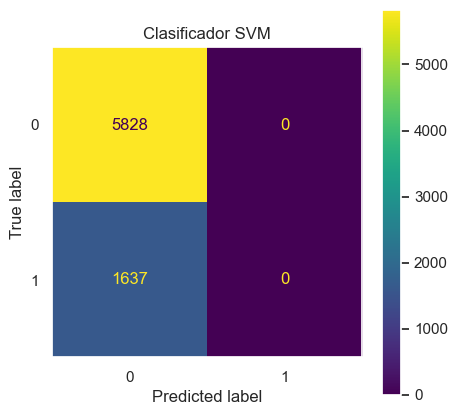

In [40]:
cm_svm = confusion_matrix(y_test, y_pred, labels=svm_credit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_credit.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador SVM");

In [39]:
# Metricas
print("Clasificador SVM")
P = np.sum(cm_knn[1, :])
N = np.sum(cm_knn[0, :])
TP = cm_knn[1, 1]
TN = cm_knn[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Clasificador SVM
Sensibilidad: 0.0
Especificidad: 1.0
Exactitud balanceada: 0.5
Precision: 0.0
Recuperación: 0.0
F1-score: 0.0
